Iteration: 0, Train Acc: 0.15991666666666668, Test Acc: 0.1614
Iteration: 1000, Train Acc: 0.9328, Test Acc: 0.9308
Iteration: 2000, Train Acc: 0.9508833333333333, Test Acc: 0.9455
Iteration: 3000, Train Acc: 0.9556166666666667, Test Acc: 0.9509
Iteration: 4000, Train Acc: 0.96455, Test Acc: 0.9571
Iteration: 5000, Train Acc: 0.96955, Test Acc: 0.9591
Iteration: 6000, Train Acc: 0.9725166666666667, Test Acc: 0.9626
Iteration: 7000, Train Acc: 0.9748166666666667, Test Acc: 0.9628
Iteration: 8000, Train Acc: 0.9771166666666666, Test Acc: 0.9657
Iteration: 9000, Train Acc: 0.9777333333333333, Test Acc: 0.967
Iteration: 0, Train Acc: 0.9790666666666666, Test Acc: 0.9632
Iteration: 1000, Train Acc: 0.9796333333333334, Test Acc: 0.9651
Iteration: 2000, Train Acc: 0.9821, Test Acc: 0.9681
Iteration: 3000, Train Acc: 0.9831666666666666, Test Acc: 0.9675
Iteration: 4000, Train Acc: 0.9825333333333334, Test Acc: 0.9678
Iteration: 5000, Train Acc: 0.9850166666666667, Test Acc: 0.9683
Iteration: 6

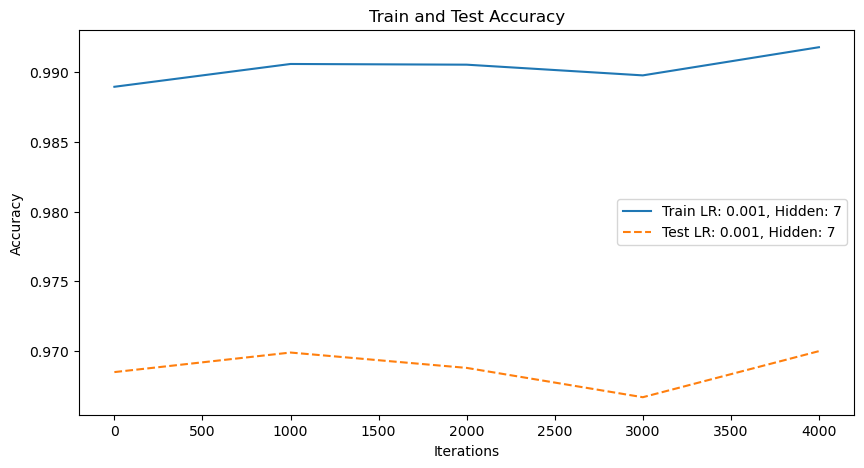

In [1]:
import sys
import os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from multi_layer_net import MultiLayerNet
from common.optimizer import Momentum

# 필요한 레이어 및 유틸리티 함수 임포트
from common.layers import BatchNormalization

# 데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 네트워크 생성
network = MultiLayerNet(input_size=784, hidden_size_list=[50, 30, 20], output_size=10,
                        activation='relu', weight_init_std='relu')

# 배치 정규화를 위한 레이어 추가
network.layers['BatchNorm1'] = BatchNormalization(50, beta=0.0)
network.layers['BatchNorm2'] = BatchNormalization(30, beta=0.0)
network.layers['BatchNorm3'] = BatchNormalization(20, beta=0.0)

# 하이퍼파라미터 설정
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100

# 학습률 범위 설정
learning_rates = np.arange(0.001, 0.02, 0.001)

# 은닉층 크기 범위 설정
hidden_sizes = np.arange(5, 16)

# 모멘텀 파라미터 설정
momentum = 0.9

train_acc_list = []
test_acc_list = []

# 하이퍼파라미터 튜닝
for lr in learning_rates:
    for hidden_size in hidden_sizes:
        network.hidden_size_list = [hidden_size, hidden_size, hidden_size]
        optimizer = Momentum(lr, momentum)  # Momentum으로 변경

        train_acc = []
        test_acc = []

        for i in range(iters_num):
            batch_mask = np.random.choice(train_size, batch_size)
            x_batch = x_train[batch_mask]
            t_batch = t_train[batch_mask]

            # 순전파
            grads = network.gradient(x_batch, t_batch)
            optimizer.update(network.params, grads)

            # 정확도 계산
            if i % 1000 == 0:
                train_acc_val = network.accuracy(x_train, t_train)
                test_acc_val = network.accuracy(x_test, t_test)
                train_acc.append(train_acc_val)
                test_acc.append(test_acc_val)
                print(f"Iteration: {i}, Train Acc: {train_acc_val}, Test Acc: {test_acc_val}")

                # 99% 정확도 달성 시 종료
                if train_acc_val >= 0.99 and test_acc_val >= 0.97:
                    train_acc_list.append((lr, hidden_size, train_acc))
                    test_acc_list.append((lr, hidden_size, test_acc))
                    print(f"Learning Rate: {lr}, Hidden Size: {hidden_size}")
                    break
        else:
            continue
        break
    else:
        continue
    break

# 결과 그래프로 출력
plt.figure(figsize=(10, 5))

# 하나의 그래프에 Train Accuracy와 Test Accuracy를 출력
for i, ((lr, hidden_size, train_acc), (_, _, test_acc)) in enumerate(zip(train_acc_list, test_acc_list)):
    plt.plot(range(0, len(train_acc) * 1000, 1000), train_acc, label=f"Train LR: {lr}, Hidden: {hidden_size}")
    plt.plot(range(0, len(test_acc) * 1000, 1000), test_acc, label=f"Test LR: {lr}, Hidden: {hidden_size}", linestyle='--')

plt.title('Train and Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.show()